In [ ]:
# Note : All the code and learning is inspired by the book 
# "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition" by Aurélien Géron

## Fashion MNIST Classification Using Sequential API

In [ ]:
import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version ", tf.__version__)  
print("tf.keras Version ",keras.__version__)

Tensorflow Version  2.4.1
tf.keras Version  2.4.0


In [ ]:
# Here We will be building an Image Classifier Using tf.keras
# We will be using Fashion MNIST dataset to this exercise

mnist_data = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#We only have train and test dataset, lets make the validataion dataset as well
#Also lets normalize the values by dividing 255, because we have values ranging 0-255

X_valid, X_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test/255

In [ ]:
print("Training Shape : ", X_train.shape, y_train.shape)
print("Testing Shape : ", X_test.shape, y_test.shape)
print("Validation Shape : ", X_valid.shape, y_valid.shape)


Training Shape :  (55000, 28, 28) (55000,)
Testing Shape :  (10000, 28, 28) (10000,)
Validation Shape :  (5000, 28, 28) (5000,)


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
#Lets Creat the Simple Model Using Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense( units = 300, activation='relu'))
model.add(keras.layers.Dense(units = 300, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))


# We could have written above code like below, we can pass the list of layers into Sequential API directly
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])


In [ ]:
# Let's Print out the Model Summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We can simply print the Model's layers 
model.layers

In [ ]:
# We Also can check the layers names at any index   
first_hidden = model.layers[1]
print(first_hidden.name)

dense


In [ ]:
# We also can access the weights fo layers 
weights, bias = first_hidden.get_weights()
print("Weights Shape :", weights.shape)
print("Biases Shape : ", bias.shape)

Weights Shape : (784, 300)
Biases Shape :  (300,)


In [ ]:
# Now When we have seen how to checkout the layers and weights, let's compile the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = 'sgd', 
              metrics = ['accuracy'])

In [ ]:
# Now Let's train the Model
# Instead of passing a validation set using the validation_data argument, 
# you could set validation_split to the ratio of the training set that you want Keras to use for validation. 
# For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0113 - accuracy: 0.6843 - val_loss: 0.5251 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5073 - accuracy: 0.8241 - val_loss: 0.4444 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4521 - accuracy: 0.8418 - val_loss: 0.4349 - val_accuracy: 0.8460
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4191 - accuracy: 0.8547 - val_loss: 0.3957 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3948 - accuracy: 0.8593 - val_loss: 0.3814 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3776 - accuracy: 0.8666 - val_loss: 0.3965 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8682 - val_loss: 0.3753 - val_accuracy:

In [ ]:
print(model.history.params)
print(model.history.epoch)
print(model.history.history)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
{'loss': [0.7242358922958374, 0.4904194176197052, 0.4428062438964844, 0.41547223925590515, 0.3943764269351959, 0.37788647413253784, 0.3647412061691284, 0.3526511490345001, 0.3424462378025055, 0.3328181803226471, 0.32302069664001465, 0.317249596118927, 0.3088506758213043, 0.30143824219703674, 0.2946840524673462, 0.2898631989955902, 0.2835744023323059, 0.27782049775123596, 0.2724474370479584, 0.26734232902526855, 0.26286405324935913, 0.2579507529735565, 0.2534605860710144, 0.24759380519390106, 0.24451737105846405, 0.24024620652198792, 0.23635780811309814, 0.2321786880493164, 0.22905051708221436, 0.22429083287715912], 'accuracy': [0.7648181915283203, 0.8309636116027832, 0.844036340713501, 0.8553454279899597, 0.8601636290550232, 0.8664000034332275, 0.8706363439559937, 0.8756181597709656, 0.8778908848762512, 0.8827272653579712, 0.88456362

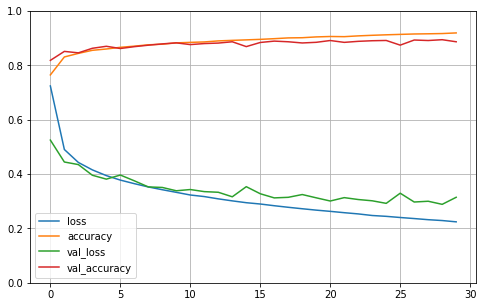

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [ ]:
# Important
# If you are not satisfied with the performance of your model, you should go back and 
# tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, 
# try another optimizer (and always retune the learning rate after changing any hyperparameter).
# If the performance is still not great, then try tuning model hyperparameters such as the number of layers, 
# the number of neurons per layer, and the types of activation functions to use for each hidden layer. 
# You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() 
# method using the batch_size argument, which defaults to 32). 

In [ ]:
# Now Let's evaluate the test dataset
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8797


[0.3458966910839081, 0.8797000050544739]

In [ ]:
# Now Let's do some prediction 
X_test_new = X_test[300:303]
y_proba = model.predict(X_test_new)
y_clases = model.predict_classes(X_test_new)
print(y_proba.round(2))
print("Predicted Classes : ", y_clases)
print("Actual Classes : ", y_test[300:303])

[[0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.93 0.06 0.   0.   0.   0.   0.  ]
 [0.   0.   0.07 0.   0.   0.   0.92 0.   0.   0.  ]]
Predicted Classes :  [3 3 6]
Actual Classes :  [3 3 6]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Building a Regression MLP Using the Sequential API

In [ ]:
# Here We will be using simple california housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing_data = fetch_california_housing()

In [ ]:
# Lets Fetch the data
data = housing_data.data
target = housing_data.target
print(data.shape)
print(target.shape)

(20640, 8)
(20640,)


In [ ]:
# Let's Split the data into train, test and validation datasets
X_train, X_test, y_train, y_test = train_test_split(data, target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

print("Training Data Shape : ", X_train.shape, y_train.shape)
print("Testing Data Shape : ", X_test.shape, y_test.shape)
print("Validataion Data Shape : ",X_valid.shape, y_valid.shape)

Training Data Shape :  (11610, 8) (11610,)
Testing Data Shape :  (5160, 8) (5160,)
Validataion Data Shape :  (3870, 8) (3870,)


In [ ]:
#Using the Scaling on the data set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
# Now Lets build the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(units = 30, activation = 'relu', input_shape = X_train.shape[1:] ))
model.add(keras.layers.Dense(units = 1))

In [ ]:
model.compile( loss = "mean_squared_error", optimizer = 'sgd')
model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.1230 - val_loss: 0.8978
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5513 - val_loss: 0.4850
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4502 - val_loss: 0.4648
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4636 - val_loss: 0.4272
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4392 - val_loss: 0.4154
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3943 - val_loss: 0.4067
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3938 - val_loss: 0.4068
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3852 - val_loss: 0.3986
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3961 - val_loss: 0.3997
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3892 - val_loss: 0.3914

In [ ]:
# Now Let's Evaluate the model Performance
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 825us/step - loss: 0.3458


0.34579288959503174